In [199]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns



In [233]:
# Load the dataset
file_path = 'Final_2_cleaned.csv'  
df = pd.read_csv(file_path)
df.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973


In [234]:
# Defining the target variable for financial health classification
def classify_financial_health(row):
    if row['PE Ratio'] > 15 and row['Beta'] < 1:
        return 'Healthy'
    elif row['PE Ratio'] <= 15 and row['Beta'] >= 1:
        return 'Moderate'
    else:
        return 'At Risk'

# Applying the classification function to create the target variable
df['Financial Health'] = df.apply(classify_financial_health, axis=1)

df.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year,Financial Health
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980,Moderate
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996,At Risk
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019,Healthy
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980,At Risk
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973,Moderate


In [239]:
X1 = df[['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)','Industry', 'Sector']]
y1 = df['Financial Health']

# print(X.head(5))
# print(y.head(5))

# Preprocessing: Encoding categorical variables and standardize numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Industry', 'Sector']), 
        ('num', StandardScaler(), ['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)']) 
    ],
     sparse_threshold=0 
)

X1_processed = preprocessor.fit_transform(X1)

In [240]:
# training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_processed, y1, test_size=0.3, random_state=42)

In [251]:
# Print the shape of training and testing sets
print(f"Training set shape: {X1_train.shape}")

# Print a sample of the training set
print("\nTraining Set Samples:")
print(pd.DataFrame(X1_train[:5]))  

print("\nTraining Labels:")
print(y1_train[:5])  


Training set shape: (133, 79)

Training Set Samples:
    0    1    2    3    4    5    6    7    8    9   ...   69   70   71   72  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    73   74   75        76        77        78  
0  0.0  0.0  0.0  0.553609  1.743484 -0.218458  
1  0.0  0.0  0.0  0.159932 -0.332155 -0.144598  
2  0.0  1.0  0.0  0.814186 -0.471590 -0.332142  
3  0.0  0.0  1.0 -0.706157 -0.413405 -0.315703  
4  0.0  0.0  0.0 -0.584305 -0.491496  0.024654  

[5 rows x 79 columns]

Training Labels:
26     Moderate
38     Moderate
117     Healthy
156     Healthy
133     Healthy
Name: Financial Health, dtype: object


In [253]:
# Print the shape of training and testing sets
print(f"Testing set shape: {X1_test.shape}")

# # Print a sample of the training set
# print("\nTesting Set Samples:")
# print(pd.DataFrame(X1_test[:5]))  

# print("\nTesting Labels:")
# print(y1_test[:5])  


# Print testing set samples (first 5 rows)
print("\nTesting Set Samples:")
print(pd.DataFrame(X1_test[:5], columns=preprocessor.get_feature_names_out()))


Testing set shape: (57, 79)

Testing Set Samples:
   cat__Industry_Aerospace & Defense  cat__Industry_Airlines  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   

   cat__Industry_Apparel Retail  cat__Industry_Asset Management  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   cat__Industry_Auto Manufacturers  cat__Industry_Banks - Diversified  \
0                               0.0                                0.0   
1             

In [ ]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X1_train, y1_train)

y1_pred = clf.predict(X1_test)

<h3>Accuracy</h3>

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y1_test, y1_pred)
conf_matrix = confusion_matrix(y1_test, y1_pred, labels=clf.classes_)

# print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.51
Confusion Matrix:
[[12 10  6]
 [ 7 16  3]
 [ 2  0  1]]


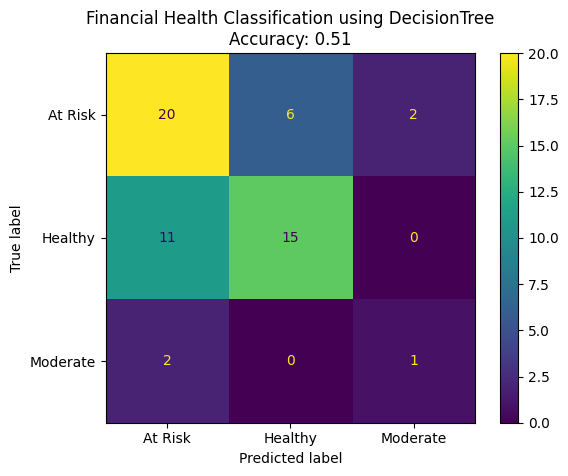

In [297]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()
plt.title("Financial Health Classification using DecisionTree")
plt.title(f"Financial Health Classification using DecisionTree\nAccuracy: {clf.score(X1_test, y1_test):.2f}")
plt.show()

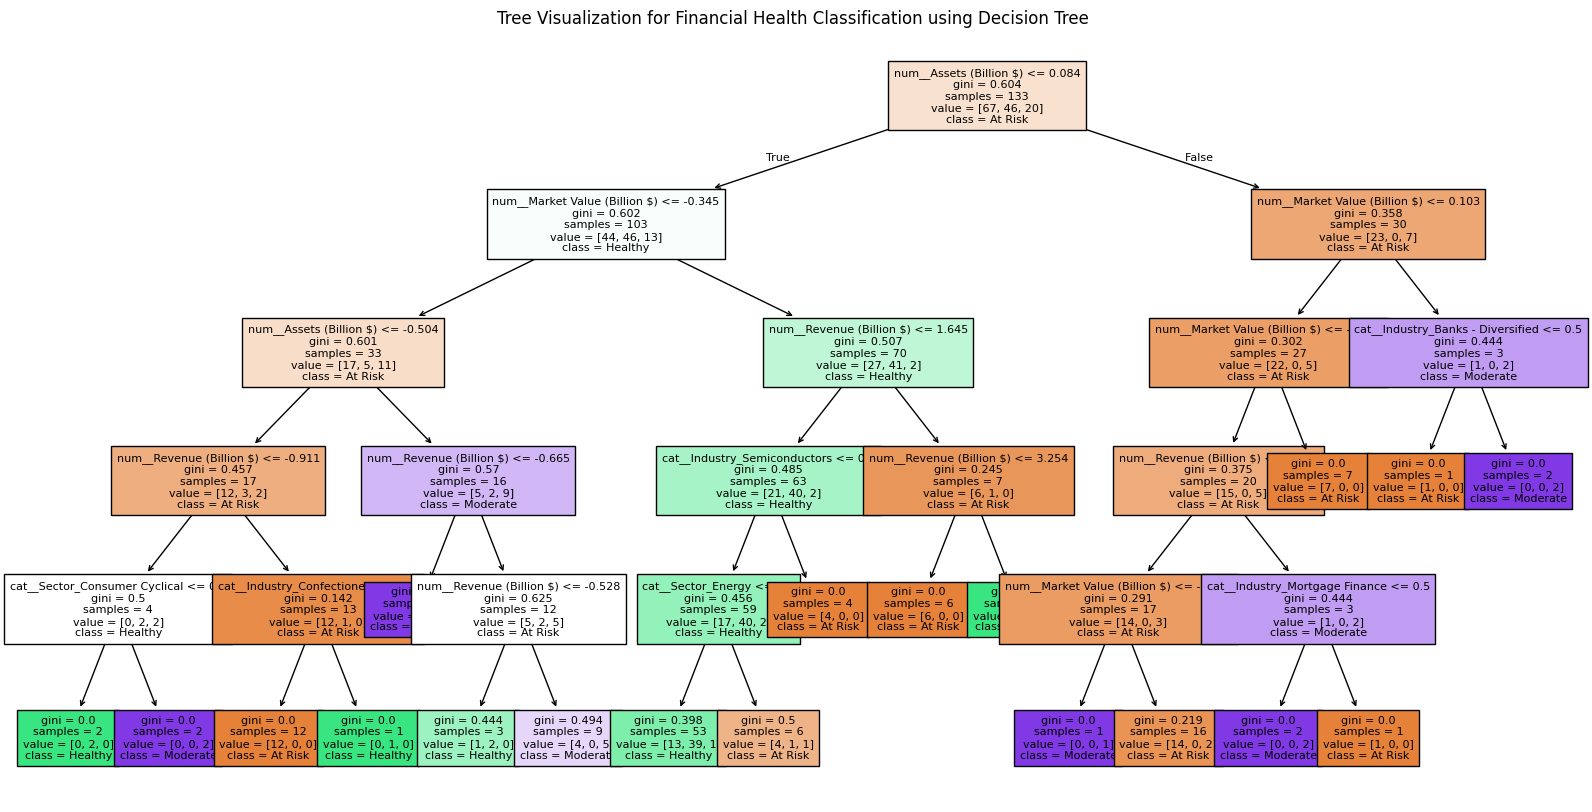

In [294]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=clf.classes_, fontsize=8)
plt.title("Tree Visualization for Financial Health Classification using Decision Tree")
plt.show()

<h1>Random Forest</h1>

In [256]:
# Feature engineering: Create new features
df['Profit_to_Revenue'] = df['Profit (Billion $)'] / df['Revenue (Billion $)']
df['MarketValue_to_Assets'] = df['Market Value (Billion $)'] / df['Assets (Billion $)']
df.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year,Financial Health,Profit_to_Revenue,MarketValue_to_Assets
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,James Dimon,Male,74.63,3.0,1.09,317233,1980,Moderate,0.197707,0.143765
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996,At Risk,0.198916,0.840280
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019,Healthy,0.239010,2.901436
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,Chen Siqing,Male,12.18,3.0,0.97,72000,1980,At Risk,0.225201,0.032675
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973,Moderate,0.136388,0.093866


In [257]:
X2 = df[['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)', 'Profit_to_Revenue', 'MarketValue_to_Assets', 'Industry', 'Sector']]
y2 = df['Financial Health']

# print(X.head(5))
# print(y.head(5))

# Preprocessing: Encode categorical variables and standardize numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Industry', 'Sector']), 
        ('num', StandardScaler(), ['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)','Profit_to_Revenue','MarketValue_to_Assets']) 
    ],
    sparse_threshold=0 
)

X2_processed = preprocessor.fit_transform(X2)

In [258]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X2_balanced, y2_balanced = smote.fit_resample(X2_processed, y2)

In [259]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_processed, y2, test_size=0.3, random_state=42)

In [260]:
# Print the shape of training and testing sets
print(f"Training set shape: {X2_train.shape}")

# Print a sample of the training set
print("\nTraining Set Samples:")
print(pd.DataFrame(X2_train[:5]))  

print("\nTraining Labels:")
print(y2_train[:5])  

Training set shape: (133, 81)

Training Set Samples:
    0    1    2    3    4    5    6    7    8    9   ...   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   

    75        76        77        78        79        80  
0  0.0  0.553609  1.743484 -0.218458 -0.016277 -0.453228  
1  0.0  0.159932 -0.332155 -0.144598 -0.006367 -0.267094  
2  0.0  0.814186 -0.471590 -0.332142 -0.019115 -0.254756  
3  1.0 -0.706157 -0.413405 -0.315703 -0.008188 -0.314397  
4  0.0 -0.584305 -0.491496  0.024654 -0.004499  0.344313  

[5 rows x 81 columns]

Training Labels:
26     Moderate
38     Moderate
117     Healthy
156     Healthy
133    

In [262]:
# Print the shape of training and testing sets
print(f"Testing set shape: {X2_test.shape}")

# # Print a sample of the training set
# print("\nTesting Set Samples:")
# print(pd.DataFrame(X1_test[:5]))  

# print("\nTesting Labels:")
# print(y1_test[:5])  


# Print testing set samples (first 5 rows)
print("\nTesting Set Samples:")
print(pd.DataFrame(X2_test[:5], columns=preprocessor.get_feature_names_out()))


Testing set shape: (57, 81)

Testing Set Samples:
   cat__Industry_Aerospace & Defense  cat__Industry_Airlines  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   

   cat__Industry_Apparel Retail  cat__Industry_Asset Management  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   cat__Industry_Auto Manufacturers  cat__Industry_Banks - Diversified  \
0                               0.0                                0.0   
1             

In [264]:
# Train a Random Forest model on the training data
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=10, random_state=42)

Accuracy: 0.63


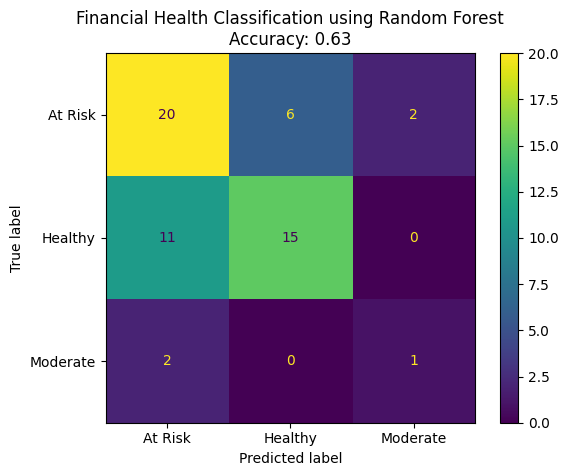

In [293]:
# Evaluate the Random Forest model's performance
y2_pred = rf_model.predict(X2_test)
accuracy = accuracy_score(y2_test, y2_pred)
conf_matrix = confusion_matrix(y2_test, y2_pred, labels=rf_model.classes_)

print(f"Accuracy: {accuracy:.2f}")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_).plot() 
plt.title(f"Financial Health Classification using Random Forest\nAccuracy: {rf_model.score(X2_test, y2_test):.2f}")
plt.show()

Top 5 Features Based on Importance:
                              Feature  Importance
80         num__MarketValue_to_Assets    0.172104
77            num__Assets (Billion $)    0.127930
76           num__Revenue (Billion $)    0.122572
78      num__Market Value (Billion $)    0.121996
79             num__Profit_to_Revenue    0.091934
67     cat__Sector_Consumer Defensive    0.034331
5   cat__Industry_Banks - Diversified    0.021982
69     cat__Sector_Financial Services    0.017932


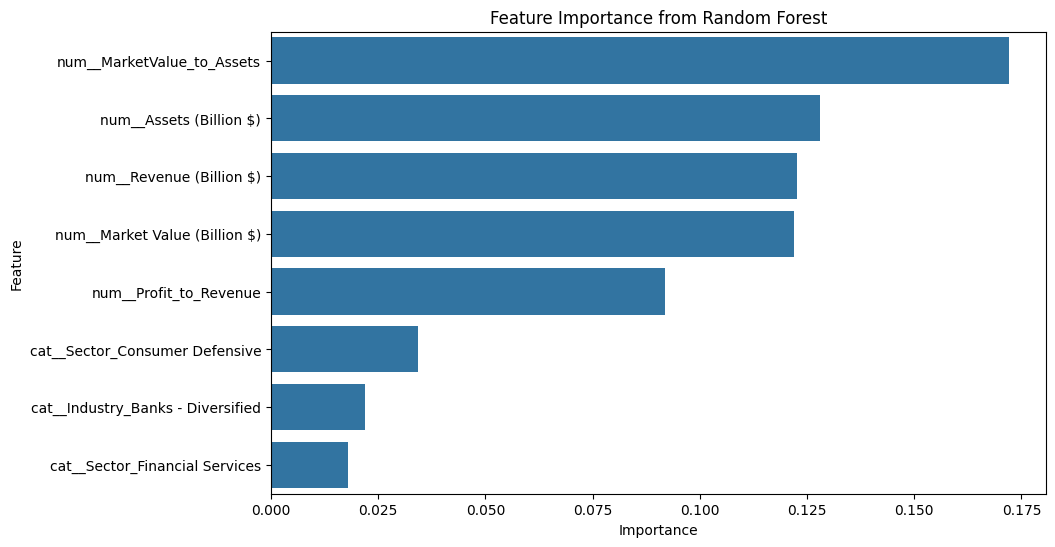

In [284]:
feature_importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_5_features = importance_df.sort_values(by='Importance', ascending=False).head(8)


# Print the top 5 features
print("Top 5 Features Based on Importance:")
print(top_5_features)

# Ploting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [286]:
# Hyperparameter tuning for decision tree classifier
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [287]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X2_train, y2_train)

best_clf = grid_search.best_estimator_

In [288]:
y2_pred = best_clf.predict(X2_test)

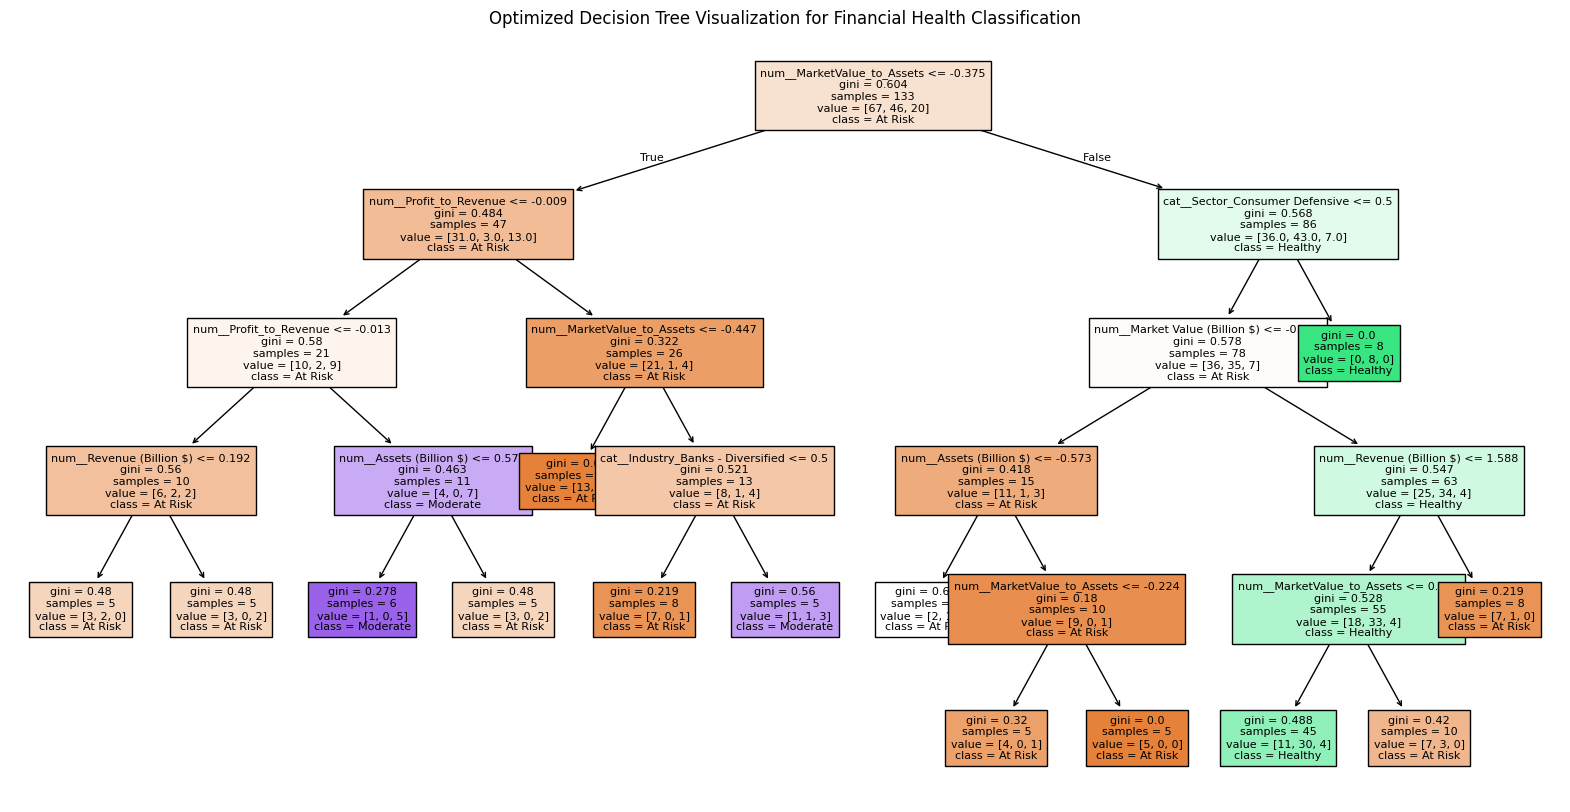

In [289]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=best_clf.classes_, fontsize=8)
plt.title("Optimized Decision Tree Visualization for Financial Health Classification")
plt.show()

Accuracy: 0.63


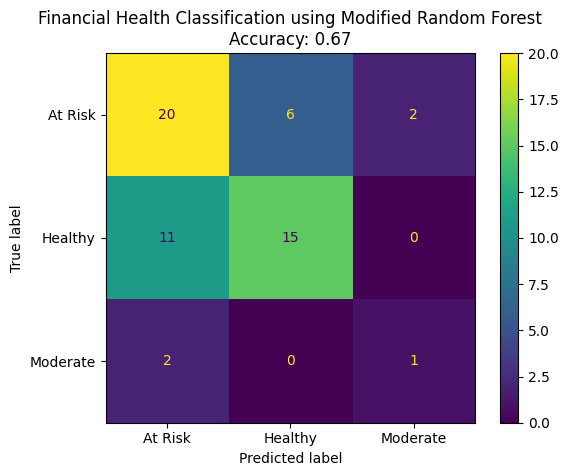

In [296]:
# Modify Random Forest parameters to create a different tree structure
rf_model_modified = RandomForestClassifier(
    random_state=42,
    n_estimators=200,          
    max_depth=6,               
    min_samples_split=5,       
    min_samples_leaf=2,       
    criterion='entropy',       
    max_features='sqrt',       
    bootstrap=False            
)


rf_model_modified.fit(X2_train, y2_train)
y2_pred_modified = rf_model_modified.predict(X2_test)

# accuracy_modified = accuracy_score(y2_test, y2_pred_modified)
# print(f"Modified Random Forest Accuracy: {accuracy_modified:.2f}")




print(f"Accuracy: {accuracy:.2f}")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model_modified.classes_).plot() 
plt.title(f"Financial Health Classification using Modified Random Forest\nAccuracy: {rf_model_modified.score(X2_test, y2_test):.2f}")
plt.show()

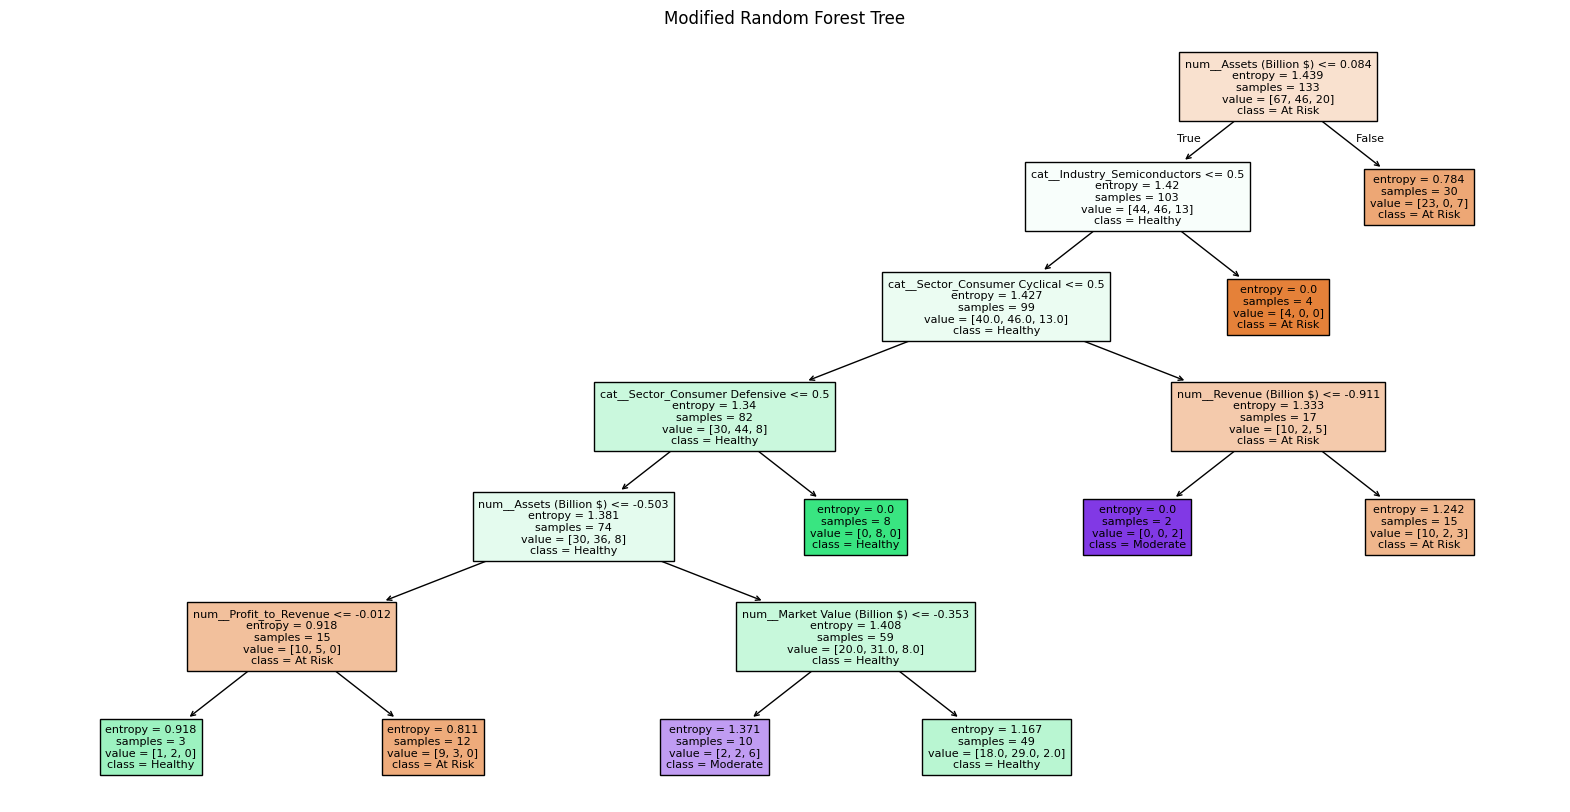

In [ ]:
single_tree_modified = rf_model_modified.estimators_[0]

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree_modified,
    filled=True,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=rf_model_modified.classes_,
    fontsize=8
)
plt.title("Modified Random Forest Tree")
plt.show()


Top 5 Features Based on Importance:
                              Feature  Importance
80         num__MarketValue_to_Assets    0.204504
78      num__Market Value (Billion $)    0.153131
77            num__Assets (Billion $)    0.141099
76           num__Revenue (Billion $)    0.085691
79             num__Profit_to_Revenue    0.071072
67     cat__Sector_Consumer Defensive    0.067042
5   cat__Industry_Banks - Diversified    0.029311
66      cat__Sector_Consumer Cyclical    0.026611


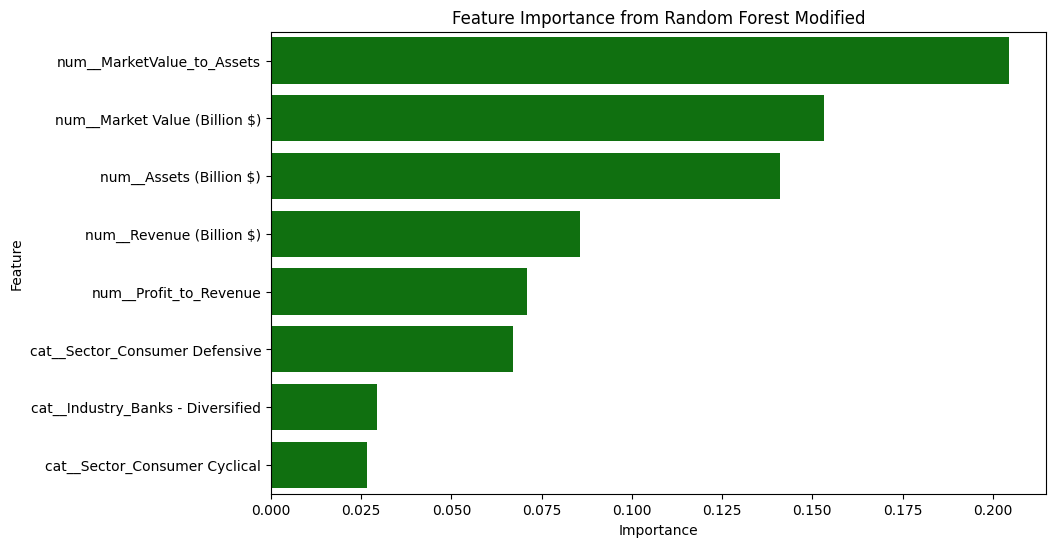

In [301]:
feature_importances_modified = rf_model_modified.feature_importances_
feature_names_modified = preprocessor.get_feature_names_out()

importance_df_modified = pd.DataFrame({'Feature': feature_names_modified, 'Importance': feature_importances_modified})
top_5_features_modified = importance_df_modified.sort_values(by='Importance', ascending=False).head(8)


# Print the top 5 features
print("Top 5 Features Based on Importance:")
print(top_5_features_modified)

# Ploting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features_modified,color='green')
plt.title("Feature Importance from Random Forest Modified")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<h1>Gradient Boosting </h1>

In [179]:
# Select features and target variable
X3= df[['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)', 'Profit_to_Revenue', 'MarketValue_to_Assets', 'Industry', 'Sector']]
y3 = df['Financial Health']

# Preprocessing: Encode categorical variables and standardize numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Industry', 'Sector']),  # Encode categorical columns
        ('num', StandardScaler(), ['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)', 'Profit_to_Revenue', 'MarketValue_to_Assets']) 
    ]
)

X3_processed = preprocessor.fit_transform(X3)

In [184]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X3_balanced, y3_balanced = smote.fit_resample(X3_processed, y3)

In [188]:

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_processed, y3, test_size=0.3, random_state=42)


In [189]:

# Hyperparameter tuning for Gradient Boosting Classifier using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [190]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [191]:
best_gb_model = grid_search.best_estimator_

In [193]:
y3_pred = best_gb_model.predict(X3_test)

In [ ]:
# # Train a Gradient Boosting model on the training data
# gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
# gb_model.fit(X3_train, y3_train)

Accuracy: 0.56


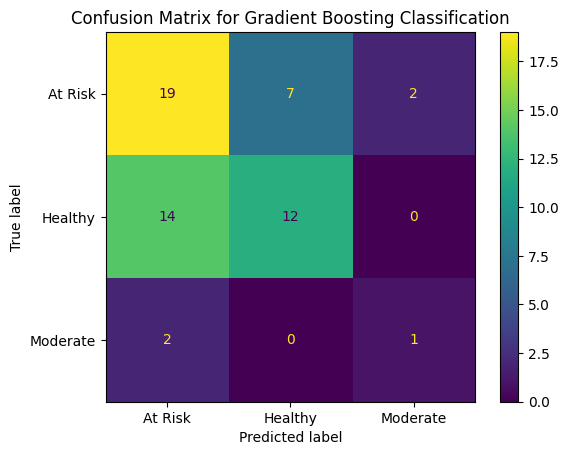

In [194]:
# Evaluate the model's performance on the test data
# y3_pred = gb_model.predict(X3_test)
accuracy = accuracy_score(y3_test, y3_pred)
conf_matrix = confusion_matrix(y3_test, y3_pred, labels=best_gb_model.classes_)

print(f"Accuracy: {accuracy:.2f}")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_gb_model.classes_).plot()
plt.title("Confusion Matrix for Gradient Boosting Classification")
plt.show()

/var/folders/bh/k3v2d3ls0nl17y_3v8vz8blm0000gn/T/ipykernel_13019/3346377367.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(5), palette='viridis')


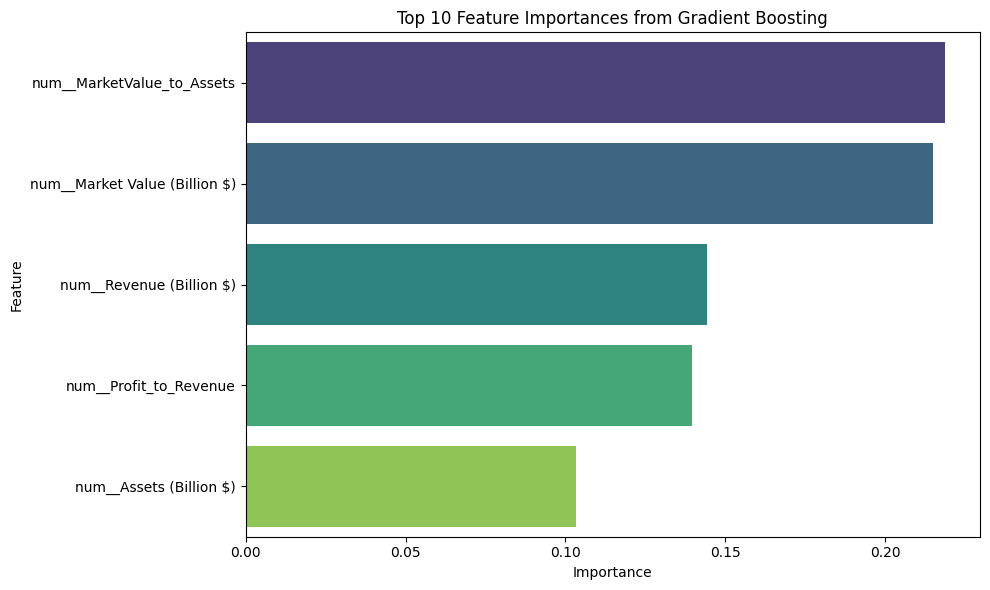

In [195]:
# Visualize feature importance from the Gradient Boosting model
feature_importances = best_gb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5), palette='viridis')
plt.title("Top 10 Feature Importances from Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()